<a href="https://colab.research.google.com/github/amruthvkbhat-creator/MachineLearning/blob/main/Week_3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression**

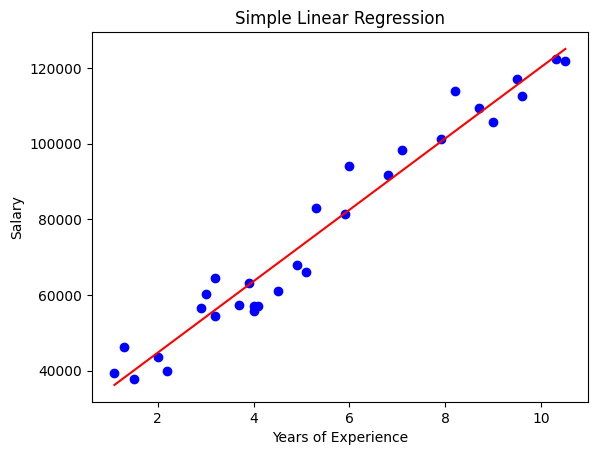

Slope: 9449.962321455076
Intercept: 25792.200198668696
R² Score: 0.9569566641435086


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv("/content/Salary_Data.csv")

X = df[["YearsExperience"]]
y = df["Salary"]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(X, y, color="blue")
plt.plot(X, y_pred, color="red")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Simple Linear Regression")
plt.show()

print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)
print("R² Score:", model.score(X, y))




Slope (9449.96) For each additional year of experience, the model predicts an increase of about $9,450 in salary

Intercept (25,792.20) This is the predicted salary when YearsExperience = 0.


Slope: 251.95013105919193
Intercept: 12954.242396307876


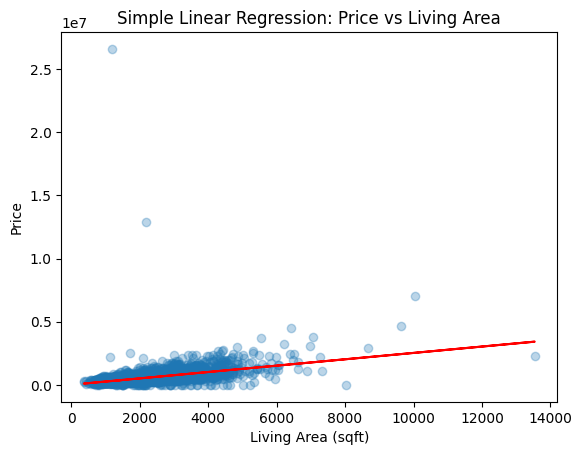

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df = pd.read_csv("/content/House Price Data Prediction.csv")

X = df[["sqft_living"]]
y = df["price"]

slr = LinearRegression()
slr.fit(X, y)

print("Slope:", slr.coef_[0])
print("Intercept:", slr.intercept_)

plt.scatter(X, y, alpha=0.3)
plt.plot(X, slr.predict(X), color="red")
plt.xlabel("Living Area (sqft)")
plt.ylabel("Price")
plt.title("Simple Linear Regression: Price vs Living Area")
plt.show()



Slope = 251.95

For every additional 1 square foot of living area, the model predicts the house price increases by about $252.

Example: If a house is 100 sqft bigger, predicted price goes up by about $25,200.

Intercept = 12,954.24

This is the predicted price when sqft_living = 0.

it’s just a mathematical baseline that helps position the line.

**Multilinear Regression**

Intercept: 4583925.323868022
Coefficients: [-5.80418404e+04  5.71994888e+04  1.64411635e+02 -6.91247693e-01
  3.98082029e+04  3.55343580e+05  4.56986738e+04  3.18436743e+04
  9.70378291e+01  6.73738056e+01 -2.37821015e+03  6.57271554e+00]
R² Score: 0.21779971300799217


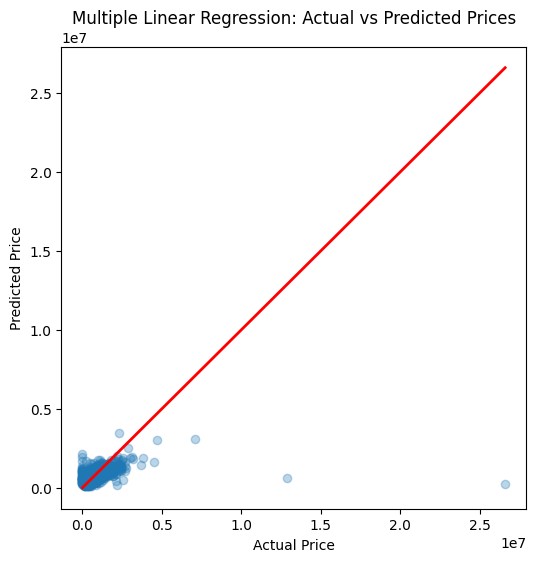

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv("/content/House Price Data Prediction.csv")

X = df[["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors",
        "waterfront", "view", "condition", "sqft_above",
        "sqft_basement", "yr_built", "yr_renovated"]]
y = df["price"]

model = LinearRegression()
model.fit(X, y)

pred = model.predict(X)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("R² Score:", r2_score(y, pred))

plt.figure(figsize=(6,6))
plt.scatter(y, pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linewidth=2)  # 45° line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Multiple Linear Regression: Actual vs Predicted Prices")
plt.show()


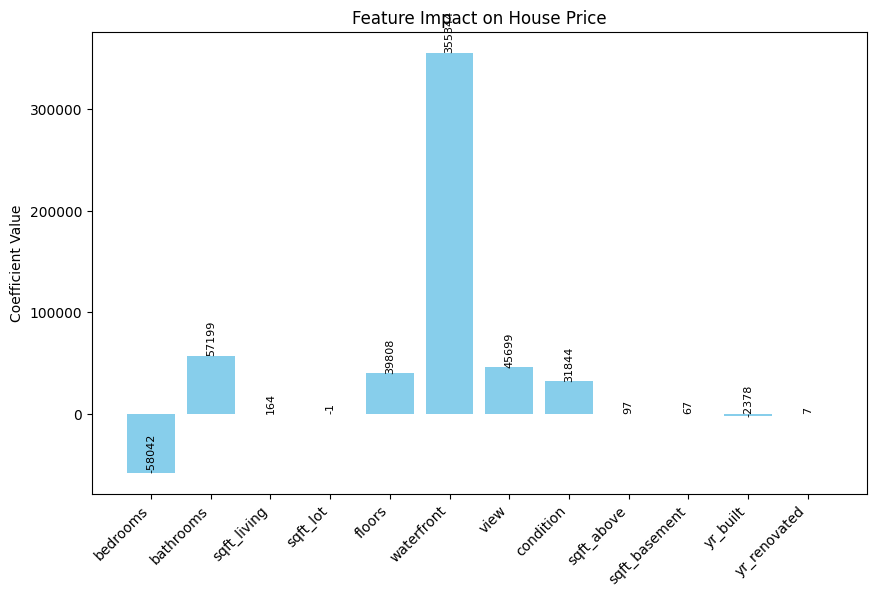

In [ ]:
import matplotlib.pyplot as plt

features = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors",
            "waterfront", "view", "condition", "sqft_above",
            "sqft_basement", "yr_built", "yr_renovated"]

coeffs = model.coef_

plt.figure(figsize=(10,6))
bars = plt.bar(features, coeffs, color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Coefficient Value")
plt.title("Feature Impact on House Price")


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval,
             f"{yval:.0f}", ha="center", va="bottom", fontsize=8, rotation=90)

plt.show()


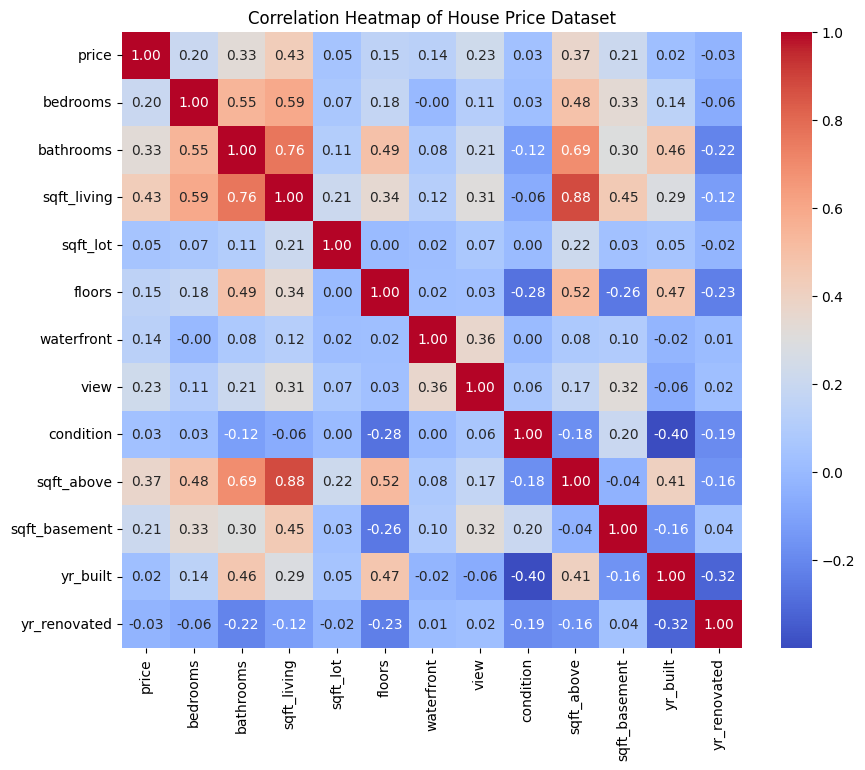

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=["int64", "float64"])

corr = numeric_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of House Price Dataset")
plt.show()


**Another Example Below**

Test set size: 4128
Mean Squared Error (MSE): 0.5558915986952422
R^2 Score: 0.5757877060324524


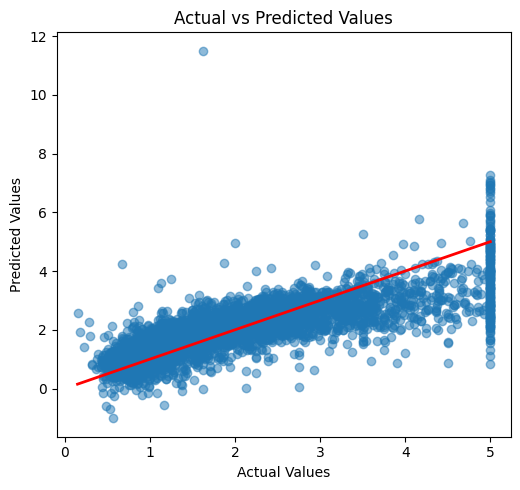

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import numpy as np
import matplotlib.pyplot as plt

california = fetch_california_housing()
X = california.data
y = california.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Test set size: {X_test.shape[0]}")

if X_test.shape[0] < 2:
    raise ValueError("The test set needs at least two samples.")

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)


plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


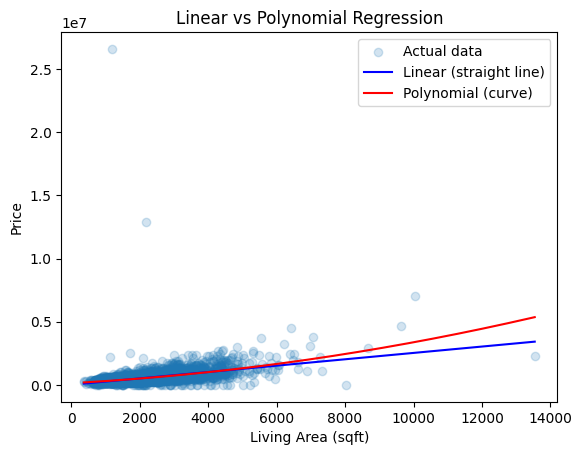

Linear R²: 0.1852527899930655
Linear MSE: 258959628843.01614
Polynomial R²: 0.19139232548312013
Polynomial MSE: 257008236052.41113


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

data = pd.read_csv("/content/House Price Data Prediction.csv")

X = data[["sqft_living"]]
y = data["price"]

linear_model = LinearRegression()
linear_model.fit(X, y)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)

X_range = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
y_linear = linear_model.predict(X_range)
y_poly = poly_model.predict(poly.transform(X_range))

plt.scatter(X, y, alpha=0.2, label="Actual data")
plt.plot(X_range, y_linear, color="blue", label="Linear (straight line)")
plt.plot(X_range, y_poly, color="red", label="Polynomial (curve)")
plt.xlabel("Living Area (sqft)")
plt.ylabel("Price")
plt.title("Linear vs Polynomial Regression")
plt.legend()
plt.show()



y_linear_pred = linear_model.predict(X)
y_poly_pred = poly_model.predict(X_poly)

print("Linear R²:", r2_score(y, y_linear_pred))
print("Linear MSE:", mean_squared_error(y, y_linear_pred))

print("Polynomial R²:", r2_score(y, y_poly_pred))
print("Polynomial MSE:", mean_squared_error(y, y_poly_pred))



**Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

X = df[["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors",
        "waterfront", "view", "condition", "sqft_above",
        "sqft_basement", "yr_built", "yr_renovated"]]
y = df["price"]

lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

pred = lasso.predict(X)

print("Intercept:", lasso.intercept_)
print("Coefficients:", lasso.coef_)
print("R² Score:", r2_score(y, pred))
print("MSE:", mean_squared_error(y, pred))
print("RMSE:", np.sqrt(mean_squared_error(y, pred)))
print("MAE:", mean_absolute_error(y, pred))


Intercept: 4583927.831545656
Coefficients: [-5.80416994e+04  5.71991043e+04  2.70403359e+02 -6.91248901e-01
  3.98076905e+04  3.55328051e+05  4.56991342e+04  3.18432671e+04
 -8.95357552e+00 -3.86177863e+01 -2.37821039e+03  6.57258070e+00]
R² Score: 0.21779971300279644
MSE: 248614899828.8347
RMSE: 498612.9759932394
MAE: 168785.2119483944


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.254e+14, tolerance: 1.462e+11
  model = cd_fast.enet_coordinate_descent(


# sqft_living = 270.40 → each extra square foot adds about $270 to price (biggest driver).

# waterfront = 355,328 → houses on the water are worth about $355k more.

# bathrooms = 57,199 → each extra bathroom adds ~$57k.

# bedrooms = -58,042 → more bedrooms reduce price if living area is fixed (too many small bedrooms).

# yr_built = -2,378 → older homes cost less, ~$2.4k drop per year.

# yr_renovated = +6.57 → minor effect, essentially irrelevant.

# sqft_lot, sqft_above, sqft_basement have very small or even negative weights.

